EMAIL SPAM DETECTION

NEEDED LIBRARIES

In [2]:
import numpy as np  # py lib used for numerical computations, maily dealing with multi-dimensional arrays.
import pandas as pd  # py lib used for data manipulation and analysis. 
import matplotlib.pyplot as plt  # py lib used for data visualization.
import seaborn as sns  # py lib used for data visualization, based on matplotlib.
import string  # py lib used for string manipulations.

# nltk - natural language toolkit
import nltk  # py lib used for natural language processing.
nltk.download('punkt')  # downloading the punkt tokenizer - used to split the text into words
nltk.download('punkt_tab') 
from nltk.tokenize import word_tokenize  # used to split the text into words
from nltk.tokenize import sent_tokenize  # used to split the text into sentences
from nltk.corpus import stopwords  # used to remove the stopwords from the text
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer  # used to convert the words into their base form
nltk.download('wordnet')

# wordcloud
from wordcloud import WordCloud # used to visualize the text data in the form of wordcloud

# collections - counter 
from collections import Counter # used to count the frequency of words in the text

# sklearn
from sklearn.model_selection import train_test_split  # a machine learning lib in python : tts function used to split your dataset into training and testing sets.  
from sklearn.feature_extraction.text import TfidfVectorizer  # feature extraction - identifying and extracting relevant features from raw data, TfidfVectorizer - transforms text to feature vectors that can be used as input estimator.
from sklearn.linear_model import LogisticRegression  # for our first model build we are using logistic regression model, LR - used for binary classification tasks.
from sklearn.metrics import accuracy_score  # performance metrics - accuracy of the model.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LOADING DATASET

In [3]:
df = pd.read_csv('maildata.csv')
print(df)  # the whole dataset

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
df.head(5)  # first 5 rows of the dataset 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail(5)  # last 5 rows of the dataset

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


DATA CLEANING, TRANSFORMATION AND EDA (EXPLORATORY DATA ANALYSIS)

In [6]:
df.info()  # provides a summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()  # checking for null values, and if any null values are present then we process the dataset to have only non-null values 

Category    0
Message     0
dtype: int64

In [8]:
df.shape  # checking for the dimensions of the dataset 

(5572, 2)

In [9]:
df.groupby('Category').size()  # checking for the classes in the dataset 

Category
ham     4825
spam     747
dtype: int64

<Axes: xlabel='Category'>

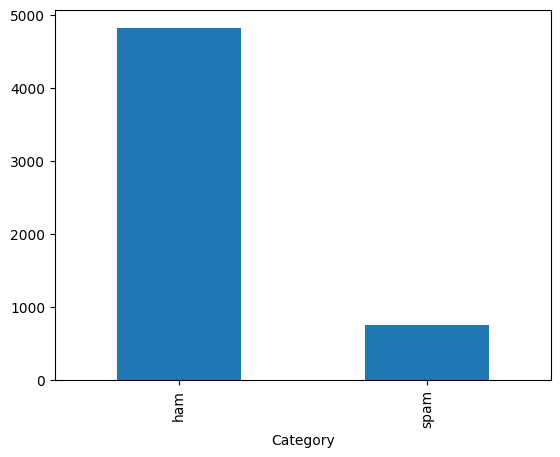

In [10]:
# Bar plot
df['Category'].value_counts().plot(kind='bar')  # plotting the classes in the dataset

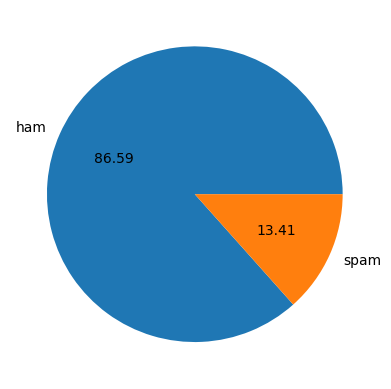

In [11]:
# Pie graph
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

NOTES: THE ABOVE DATASET IS IMBALANCED. ALMOST 4/5th OF THE DATASET IS MADE UP OF HAM.

In [12]:
# Statistical analysis of the dataset - 1

word_tokens = df['Message'].apply(word_tokenize)  # tokenizing the words in the message
df['num_words'] = word_tokens.apply(len)  # contiains the number of words in the message 
df['num_char'] = df['Message'].apply(len)  # adding a new column to the dataset - num_char, which contains the length of the message
df['num_sentences'] = df['Message'].apply(lambda x: len(sent_tokenize(x)))
df.head()

,Category,Message,num_words,num_char,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",24,111,2
1,ham,Ok lar... Joking wif u oni...,8,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,ham,U dun say so early hor... U c already then say...,13,49,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [13]:
# Statistical analysis of the dataset - 2

# for Ham messages
ham_df = df[df['Category'] == 'ham'][['num_words', 'num_char', 'num_sentences']]
ham_df.describe()

,num_words,num_char,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,17.425699,71.448290,1.846010
std,14.118631,58.434864,1.475377
min,1.000000,2.000000,1.000000
25%,8.000000,33.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,23.000000,93.000000,2.000000
max,220.000000,910.000000,38.000000


In [14]:
# for spam messages 
spam_df = df[df['Category'] == 'spam'][['num_words', 'num_char', 'num_sentences']]
spam_df.describe()

,num_words,num_char,num_sentences
count,747.000000,747.000000,747.000000
mean,27.878179,137.989290,3.029451
std,7.036282,29.980287,1.552198
min,2.000000,7.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


NOTE: 
- WE CAN SEE THAT THE SPAM MESSAGES ARE TYPICALLY LONGER IN LENGTH.
- DUE TO THIS THESE SENTENCES CONTAIN MORE WORDS AND CHARACTERS.

<Axes: xlabel='num_char', ylabel='Count'>

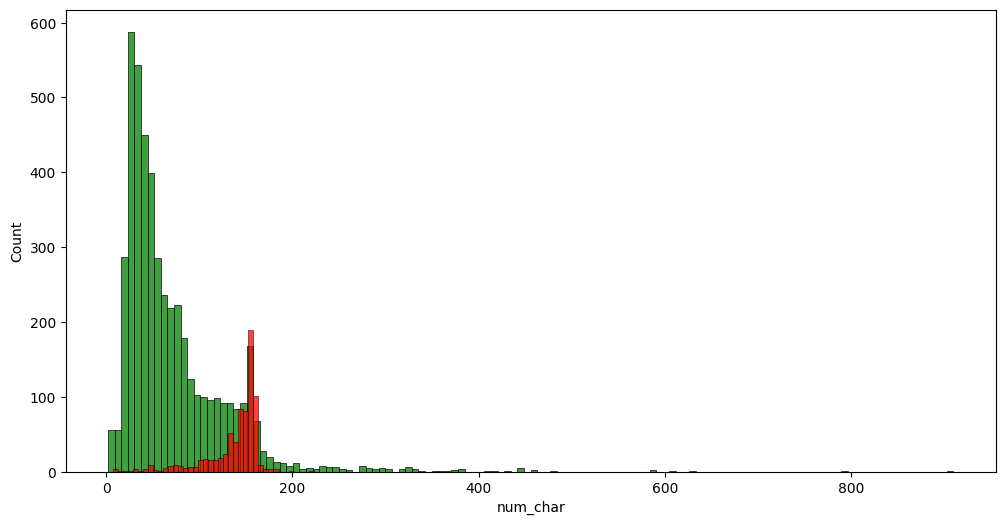

In [15]:
# histogram for character count
plt.figure(figsize=(12,6)) 
sns.histplot(df[df['Category']=='ham']['num_char'],color='green')
sns.histplot(df[df['Category']=='spam']['num_char'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

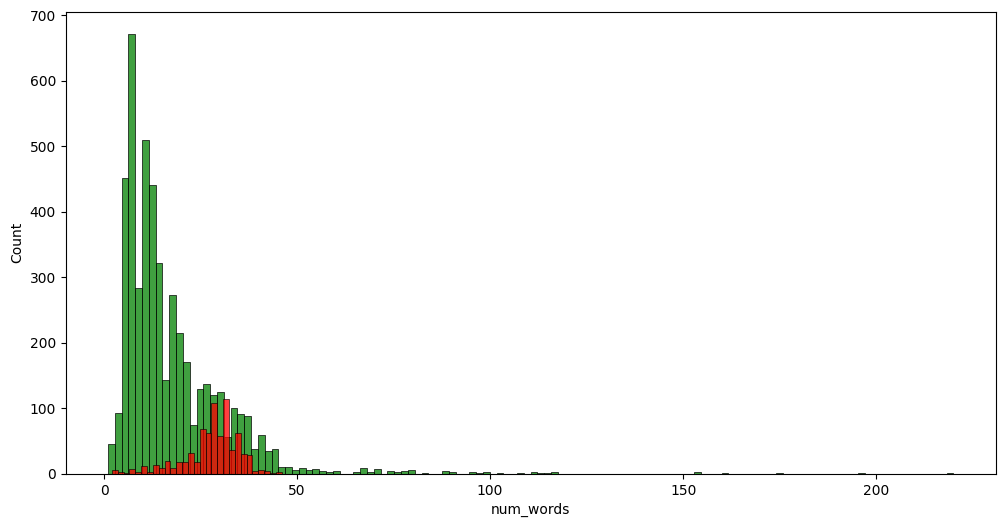

In [16]:
# histogram for word count 
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']=='ham']['num_words'], color='green')
sns.histplot(df[df['Category']=='spam']['num_words'], color='red')

# OBSERVATIONS: 
## HAM MESSAGES:
    - MEAN LENGTH : ~50-100 CHARACTERS / ~15-25 WORDS
    - ON AVERAGE SHORT TEXTS (BUT DUE TO VARIANCE SOME CAN BE EXTREMELY SHORT WHILE OTHERS VERY LONG)
    - SPREAD/VARIANCE : HIGH (SOME SHORT/ SOME LONG)
    - SKEWNESS : RIGHT 
    - THEY USE LESS SENTENCES ON AVERAGE
## SPAM MESSAGES:
    - MEAN LENGTH : ~130-150 CHARACTERS / ~20-40 WORDS
    - ON AVERAGE MED-LENGTH TEXTS.
    - SPREAD/VARIANCE : LOW
    - SKEWNESS : LESS SKEWED BUT PEAKS IN MID-RANGE
    - THEY USE MORE SENTENCES ON AVERAGE

# POSSIBLE CONCLUSIONS:
    - SPAM MESSAGES TEND TO HAVE MORE WORDS AND CHARACTERS.
    - SPAM MESSAGES HAVE A STANDARDIZED LENGTH, SUGGESTS THEY FOLLOW SIMILAR TEMPLATE, THEREBY SHOWING A LOW VARIANCE
    - THEY HAVE MORE SENTENCES IN GENERAL PERHAPS TO MISLEAD USERS
    - HIGH VARIANCE IN HAM SUGGEST DIVERSE CONTENT

In [17]:
# encoding 
# replacing the values of the column 'Category', where 0 -> spam and 1 -> ham 
df['Category'] = df['Category'].replace({'spam': 0, 'ham': 1})
df_heat = df.drop(columns=['Message'])

C:\Users\Rohit\AppData\Local\Temp\ipykernel_8000\996408548.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace({'spam': 0, 'ham': 1})


In [18]:
print(df_heat.dtypes)

Category         int64
num_words        int64
num_char         int64
num_sentences    int64
dtype: object


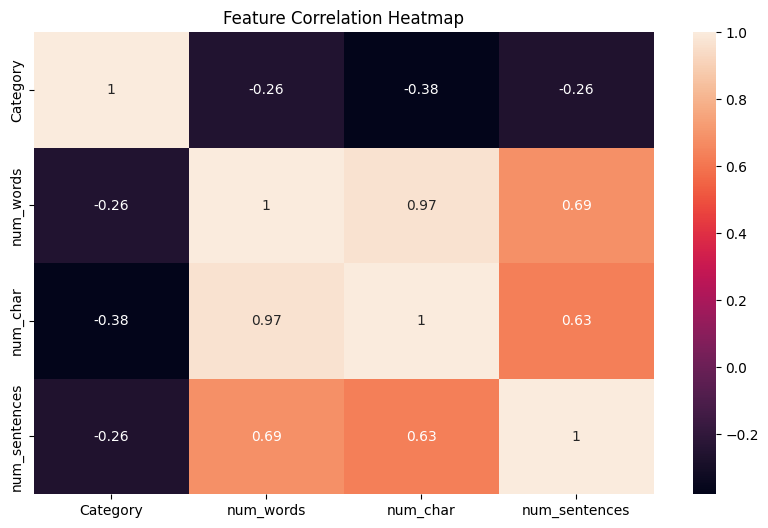

In [19]:
# CHECKING FOR CORRELATION - FEATURE SELECTION USING HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(df_heat.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# OBSERVATIONS : 
    - MULTI-COLLINEARITY EXISTS BETWEEN ALL THREE FEATURES WHICH MAY LEAD TO OVERFITTING DUE TO LEARNING OF SIMILAR PATTERNS MULTIPLE TIMES.
    - NO. OF CHARACTERS HAS THE HIGHEST CORRELATION AMONG THE FEATURES WITH THE CATEGORY.
# CONCLUSIONS : 
    - TO DECREASE OVERFITTING WE WILL ONLY BE USING ONE OF THE FEATURES FROM THE THREE, I.E. NO. OF CHARACTERS AS IT HAS THE HIGHEST CORRELATION WITH THE TARGET/LABEL

DATA PREPROCESSING

In [20]:
# Lowercase conversion
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message,num_words,num_char,num_sentences
0,1,"go until jurong point, crazy.. available only ...",24,111,2
1,1,ok lar... joking wif u oni...,8,29,2
2,0,free entry in 2 a wkly comp to win fa cup fina...,37,155,2
3,1,u dun say so early hor... u c already then say...,13,49,1
4,1,"nah i don't think he goes to usf, he lives aro...",15,61,1


In [21]:
# tokenization 
df['tokens'] = df['Message'].apply(word_tokenize)
df.head()

,Category,Message,num_words,num_char,num_sentences,tokens
0,1,"go until jurong point, crazy.. available only ...",24,111,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,1,ok lar... joking wif u oni...,8,29,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,0,free entry in 2 a wkly comp to win fa cup fina...,37,155,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,1,u dun say so early hor... u c already then say...,13,49,1,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,1,"nah i don't think he goes to usf, he lives aro...",15,61,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [22]:
# Stopword removal - those words that don't add meaning to the learning process (a, an, the, etc.)
stop_words = set(stopwords.words('english'))  # set-unique collection of stopwords in english language
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])  # removing the stopwords from the tokens
df.head()

,Category,Message,num_words,num_char,num_sentences,tokens
0,1,"go until jurong point, crazy.. available only ...",24,111,2,"[go, jurong, point, ,, crazy, .., available, b..."
1,1,ok lar... joking wif u oni...,8,29,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,0,free entry in 2 a wkly comp to win fa cup fina...,37,155,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,1,u dun say so early hor... u c already then say...,13,49,1,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,1,"nah i don't think he goes to usf, he lives aro...",15,61,1,"[nah, n't, think, goes, usf, ,, lives, around,..."


In [23]:
# Removing Punctuation & Special Characters 

df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalnum()])  # alnum refers to alphanumeric characters i.e. [a-zA-Z0-9]
df.head()

,Category,Message,num_words,num_char,num_sentences,tokens
0,1,"go until jurong point, crazy.. available only ...",24,111,2,"[go, jurong, point, crazy, available, bugis, n..."
1,1,ok lar... joking wif u oni...,8,29,2,"[ok, lar, joking, wif, u, oni]"
2,0,free entry in 2 a wkly comp to win fa cup fina...,37,155,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,1,u dun say so early hor... u c already then say...,13,49,1,"[u, dun, say, early, hor, u, c, already, say]"
4,1,"nah i don't think he goes to usf, he lives aro...",15,61,1,"[nah, think, goes, usf, lives, around, though]"


In [24]:
# Lemmatization or Stemming - converting the words into their base form (eg. running -> run)

lemmatizer = PorterStemmer()  # for agressive stemming or else WordNetLemmatizer can be used
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.stem(word) for word in x])
df.head()

,Category,Message,num_words,num_char,num_sentences,tokens
0,1,"go until jurong point, crazy.. available only ...",24,111,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,1,ok lar... joking wif u oni...,8,29,2,"[ok, lar, joke, wif, u, oni]"
2,0,free entry in 2 a wkly comp to win fa cup fina...,37,155,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,1,u dun say so early hor... u c already then say...,13,49,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,1,"nah i don't think he goes to usf, he lives aro...",15,61,1,"[nah, think, goe, usf, live, around, though]"


In [25]:
# Converting the list of tokens to a string format
df["tokens"] = df["tokens"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [26]:
# Creating a word cloud - to visualize the most frequent words in the dataset
wordCloud = WordCloud(width=1000, height=500, min_font_size=10, background_color='white')

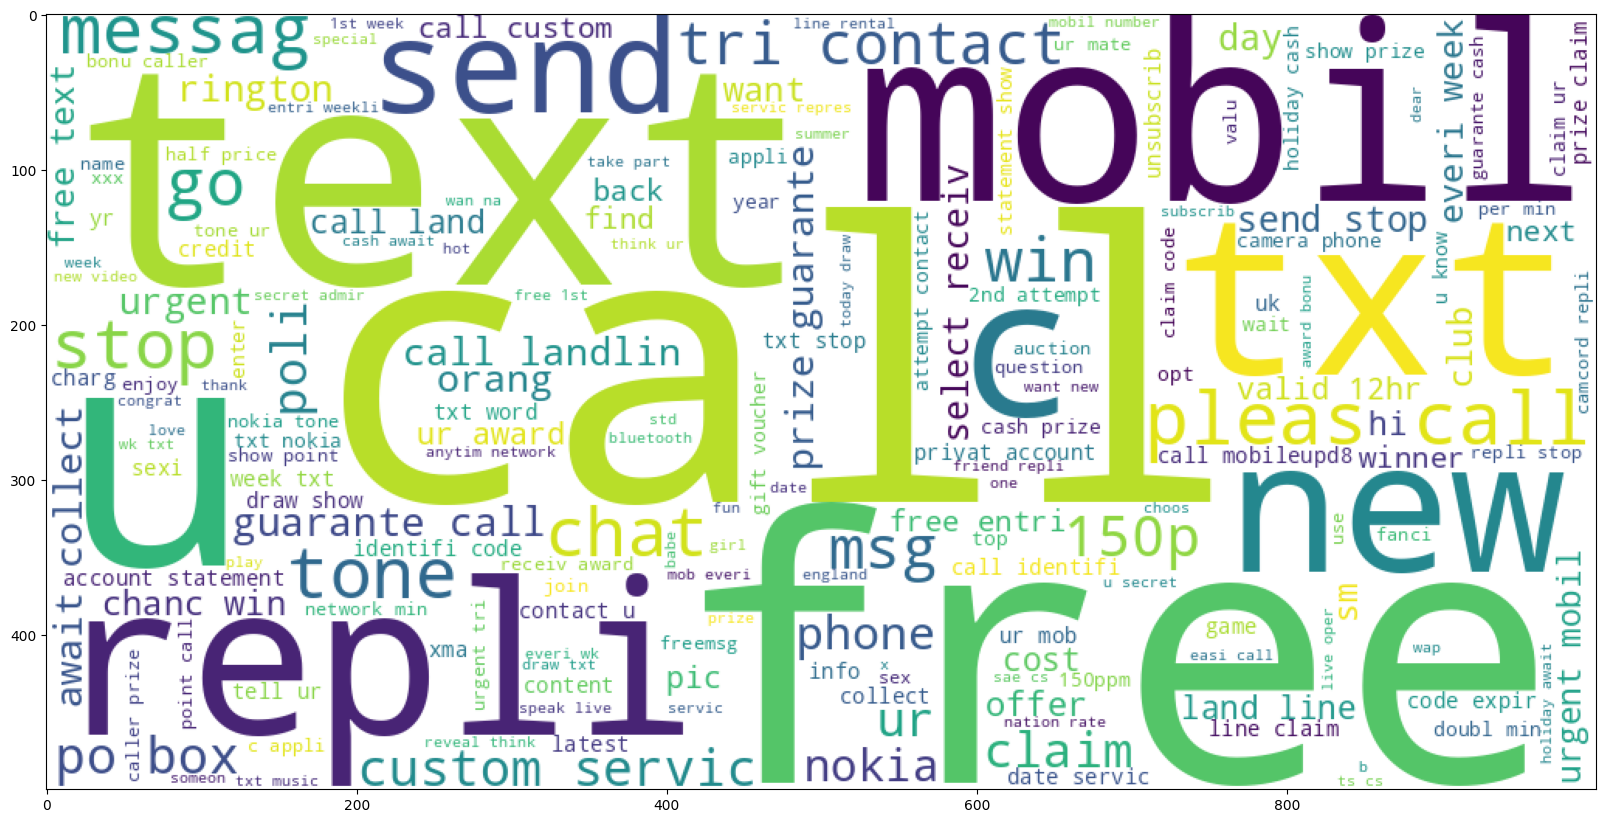

In [27]:
# for spam messages 
spam_wordCloud  = wordCloud.generate(' '.join(df[df['Category']==0]['tokens']))
plt.figure(figsize=(20, 15))
plt.imshow(spam_wordCloud)

### NOTE: 
    - LARGER WORDS DENOTE MORE FREQUENCT APPEARANCE IN THE DATASET 
    - WE CAN SEE THAT FOR THE SPAM CATEGORY : THE WORDS LIKE "CALL", "FREE", "TEXT", "WIN", "PRIZE", "MOBILE", "REPLY", "STOP", "MSG", ETC APPEAR
      MORE FREQUENTLY THROUGHOUT THE DATASET.
    - THESE WORDS ARE COMMON AND CAN BE USED TO DISTINGUISH BETWEEN SPAM AND HAM MESSAGES.  

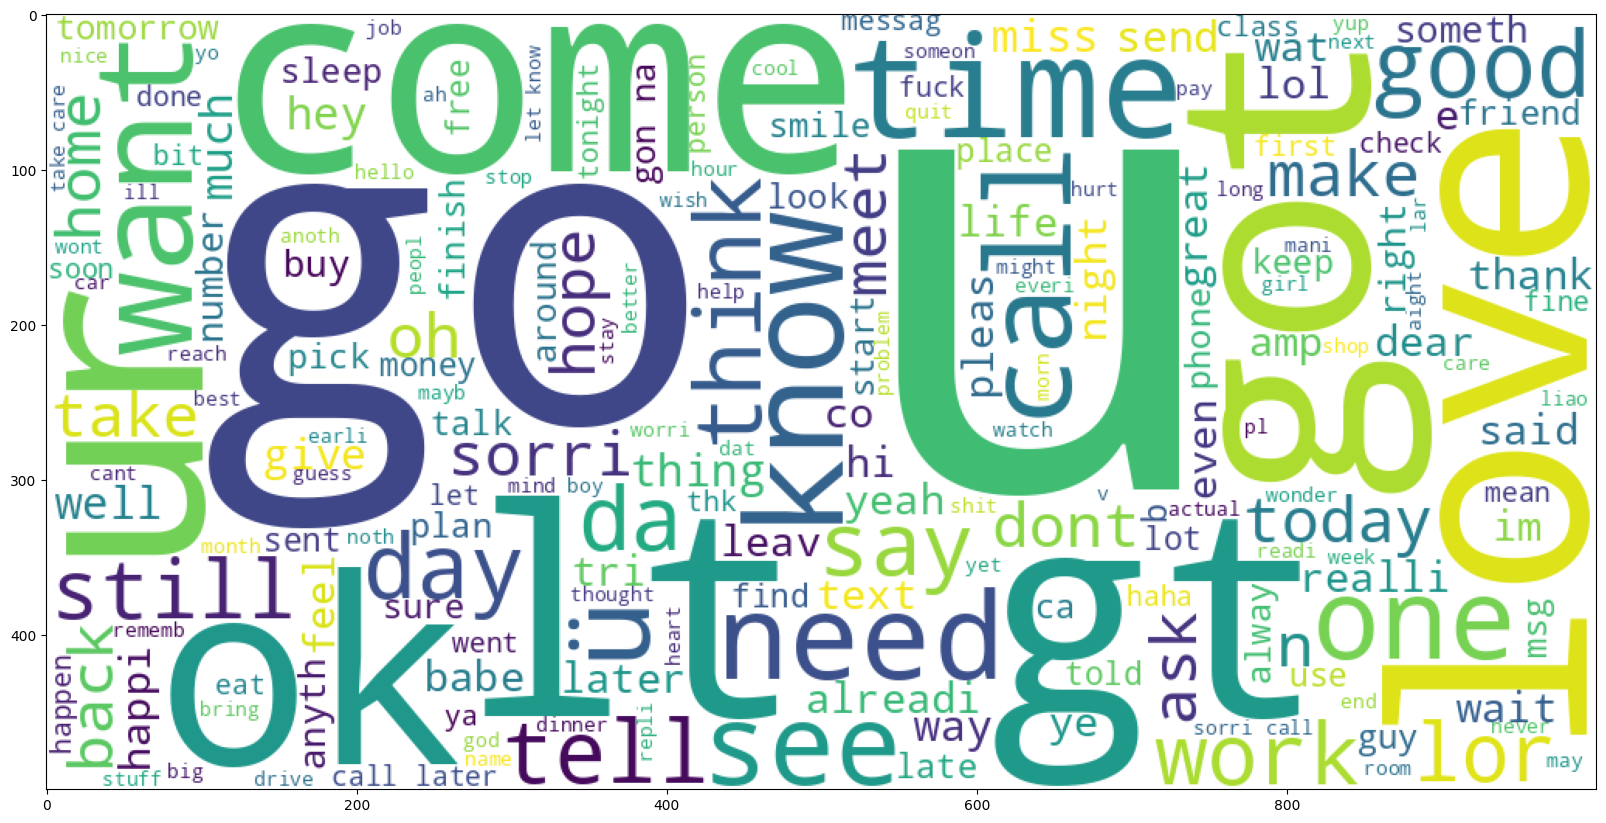

In [28]:
# for ham messages 
ham_wordCloud = wordCloud.generate(' '.join(df[df['Category']==1]['tokens']))
plt.figure(figsize=(20, 15))
plt.imshow(ham_wordCloud)

### NOTE: 
    - WITH THIS WORD CLOUD WE CAN SEE HOW THE FREQUENCY OF WORDS USED IN HAM AND SPAM MSG'S DIFFER FROM EACH OTHER
    - COMMON WORDS IN HAM MSG'S INCLUDE : "U", "OK", "GO", "LOVE", "GOT", "TIME", "COME"
    - WITH THIS WE CAN SEE THAT HAM MSG'S CONTAIN WORDS THAT ARE MORE CONVERSATIONAL AND CASUAL
    - HAM MSG'S HAVE FRIENDLY OR AFFECTIONATE WORDS THAT INDICATE PERSONAL CHAT
    - WHILE SPAM MSG'S CONTAIN MORE PROMOTIONAL CONTENT AND WORDS THAT PUSH THE RECIPIENT TOWARDS AN ACTION SUCH AS "URGENT", "CLAIM", "CONGRATULATIONS"

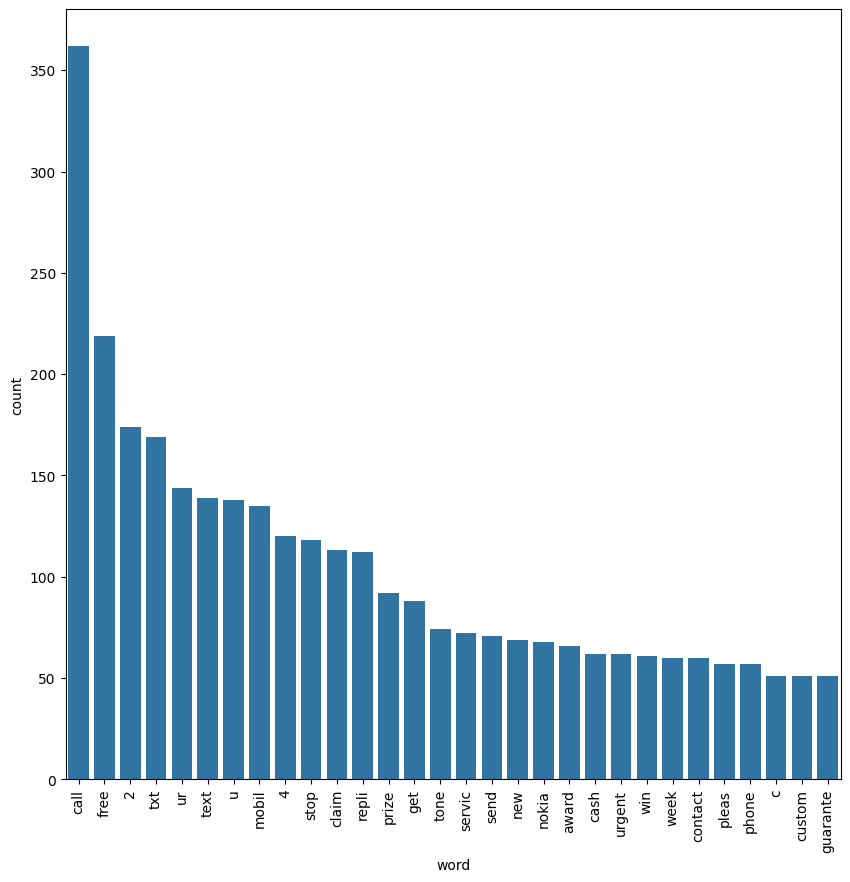

In [29]:
# simplifying the word cloud analysis 
# showcasing the top 30 words in both the spam messages 
spam_corpus = []  # list to store the words in spam messages
for text in df[df['Category'] == 0]['tokens'].tolist():
    for word in text.split():
        spam_corpus.append(word)


commonSpam = Counter(spam_corpus).most_common(30)
commonSpam_df = pd.DataFrame(commonSpam, columns=['word', 'count'])

plt.figure(figsize=(10, 10))

sns.barplot(x=commonSpam_df['word'], y=commonSpam_df['count'])
plt.xticks(rotation='vertical')
plt.show()


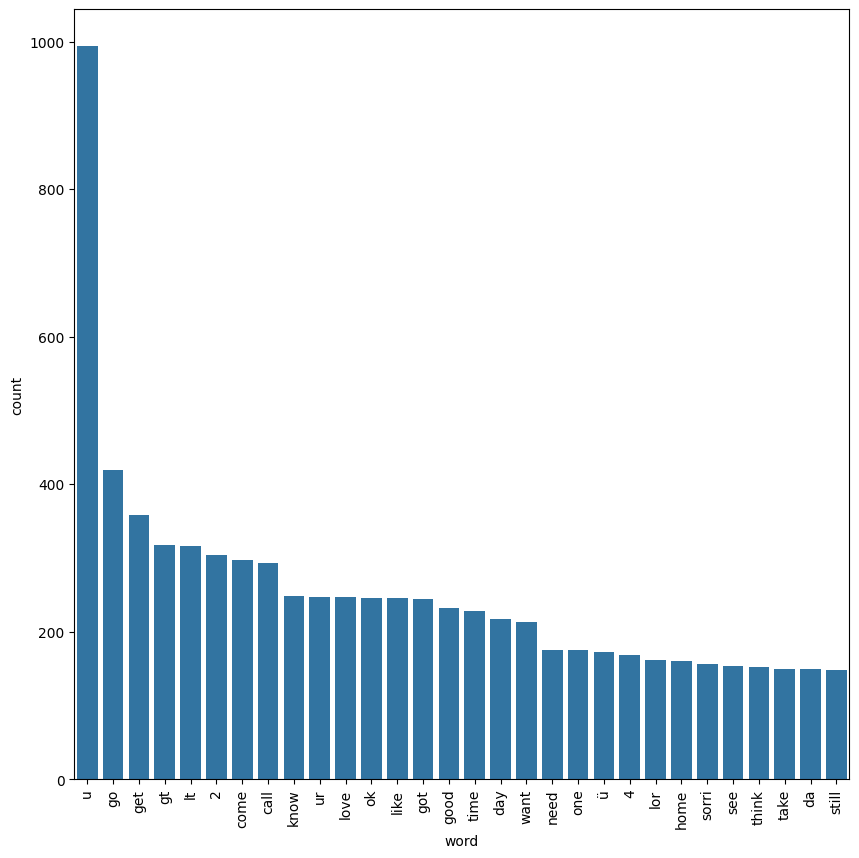

In [30]:
# showcasing the top 30 words in both the ham messages 
ham_corpus = []  # list to store the words in ham messages
for text in df[df['Category'] == 1]['tokens'].tolist():
    for word in text.split():
        ham_corpus.append(word)


commonham = Counter(ham_corpus).most_common(30)
commonham_df = pd.DataFrame(commonham, columns=['word', 'count'])

plt.figure(figsize=(10, 10))

sns.barplot(x=commonham_df['word'], y=commonham_df['count'])
plt.xticks(rotation='vertical')
plt.show()


# WORD EMBEDDING USING TF - IDF
    - VECTORIZE THE COLUMN 

NOTE : ALTHOUGH TF-IDF IS GENERALLY NOT CONSIDERED A TRUE WORD EMBEDDING BECAUSE IT LACKS THE CAPABILITY TO CAPTURE SEMANTIC RELATIONSHIPS BETWEEN WORDS.
IT IS PRIMARILY A FREQUENCY-BASED METHOD FOCUSING ON THE IMPORTANCE OF A WORD WITHIN A SPECIFIC DOCUMENT BASED ON ITS OCCURRENCE ACROSS A CORPUS.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer  # feature extraction - identifying and extracting relevant features from raw data
# TfidfVectorizer - transforms text to feature vectors that can be used as input estimator.
from sklearn.model_selection import train_test_split  # tts function used to split your dataset into training and testing sets.

In [32]:
# Checking the number of features in the dataset
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['tokens'])

num = len(tfidf.get_feature_names_out())
print(num)

6781


In [33]:
# creating an object of TfidfVectorizer 
# converts collection of raw text documents to a matrix of TF-IDF features 
tfidf = TfidfVectorizer(smooth_idf=True, min_df=2, max_df=0.85, max_features = 6000)  



X = tfidf.fit_transform(df['tokens']).toarray()  # transforming the text data into feature vectors                
y = df['Category'].values # transforming the text data into feature vectors

# random state - controls the shuffling applied to the data before applying the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)  


# MODEL BUILDING USING NAIVE BAYES

In [34]:
from sklearn.naive_bayes import GaussianNB  # naive bayes algorithm that assumes all features follow a normal distribution 

from sklearn.naive_bayes import BernoulliNB  # naive bayes algorithm desgined to work with data where features are binary

from sklearn.naive_bayes import MultinomialNB  # naive bayes designed for classifying data 


# Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [35]:
gnb = GaussianNB()  # creating an object of GaussianNB
bnb = BernoulliNB()  # creating an object of BernoulliNB
mnb = MultinomialNB()  # creating an object of MultinomialNB

In [36]:
accuracy_scores = []
precision_scores = []

In [37]:
# Gaussian Naive Bayes
gnb.fit(X_train, y_train)  # fitting the model on the training data
y_pred_gnb = gnb.predict(X_test)  # predicting the values on the test data

print('Performance Metrics of Gaussian NB')
print('Accuracy score:',accuracy_score(y_test,y_pred_gnb))  # accuracy score - the proportion of correct predictions
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_gnb))  # confusion matrix - a table used to describe the performance of a classification model
print('Precision score:',precision_score(y_test,y_pred_gnb))  # precision score - the proportion of true positive predictions out of all positive predictions

accuracy_scores.append(accuracy_score(y_test,y_pred_gnb))
precision_scores.append(precision_score(y_test,y_pred_gnb))

Performance Metrics of Gaussian NB
Accuracy score: 0.8565022421524664
Confusion Matrix: 
 [[130  28]
 [132 825]]
Precision score: 0.9671746776084408


In [38]:
# Bernoulli Naive Bayes
bnb.fit(X_train, y_train)  
y_pred_bnb = bnb.predict(X_test)

print('Performance Metrics of Bernoulli NB')
print('Accuracy score: ',accuracy_score(y_test,y_pred_bnb))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_bnb))
print('Precision score:',precision_score(y_test,y_pred_bnb))

accuracy_scores.append(accuracy_score(y_test,y_pred_bnb))
precision_scores.append(precision_score(y_test,y_pred_bnb))

Performance Metrics of Bernoulli NB
Accuracy score:  0.9748878923766816
Confusion Matrix: 
 [[132  26]
 [  2 955]]
Precision score: 0.9734964322120285


In [39]:
# Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print('Performance Metrics of Multinomial NB')
print('Accuracy score: ',accuracy_score(y_test,y_pred_mnb))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_mnb))
print('Precision score:',precision_score(y_test,y_pred_mnb))

accuracy_scores.append(accuracy_score(y_test,y_pred_mnb))
precision_scores.append(precision_score(y_test,y_pred_mnb))

Performance Metrics of Multinomial NB
Accuracy score:  0.967713004484305
Confusion Matrix: 
 [[122  36]
 [  0 957]]
Precision score: 0.9637462235649547


# FURTHER TUNING THE BERNOULLINB
NOTE: FROM CURRENT STEPS INVOLVED WE CAN CLEARLY SEE THAT THE BERNOULLI NB IS THE BEST PERFORMING MODEL

In [40]:
from sklearn.model_selection import GridSearchCV  # used to find the best parameters for the model

In [48]:
# Hyperparameter tuning for Bernoulli Naive Bayes
params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  # defining the hyperparameters for the model
grid_search = GridSearchCV(estimator = bnb, param_grid = params, scoring = 'precision', cv = 5)  # creating an object of GridSearchCV
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_  # finding the best model

In [42]:
y_pred_best = best_model.predict(X_test)  # predicting the values on the test data
accuracy = accuracy_score(y_test, y_pred_best)  # calculating the accuracy of the model
matrix = confusion_matrix(y_test, y_pred_best)  # calculating the confusion matrix of the model
precision = precision_score(y_test, y_pred_best)  # calculating the precision score of the model
print('Accuracy score:', accuracy)  # printing the accuracy of the model
print('Confusion Matrix:\n', matrix)  # printing the confusion matrix of the model
print('Precision score:', precision)  # printing the precision score of the model

accuracy_scores.append(accuracy)
precision_scores.append(precision)

Accuracy score: 0.9802690582959641
Confusion Matrix:
 [[137  21]
 [  1 956]]
Precision score: 0.9785056294779939


In [43]:
clfs = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB(),    
    'best_model': best_model
}


In [44]:
# checking the number of models
print(len(clfs.keys()))
print(len(accuracy_scores))

4
4


In [45]:
# For final analysis of the best model
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending = False)

print(temp_df)

       Algorithm  Accuracy  Precision
3     best_model  0.980269   0.978506
1    BernoulliNB  0.974888   0.973496
0     GaussianNB  0.856502   0.967175
2  MultinomialNB  0.967713   0.963746


In [47]:
import pickle 
pickle.dump(best_model, open('model.pkl', 'wb'))  # saving the model as a pickle file
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))  # saving the tfidf object as a pickle file